In [19]:
%matplotlib inline
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from math import sqrt
from scipy.spatial.distance import squareform

In [20]:
words = pd.read_csv('data/50words_TEST.csv', index_col = 0, header = None)

### Let's take a look at some of the words 'on average'

In [21]:
words.shape

(455, 270)

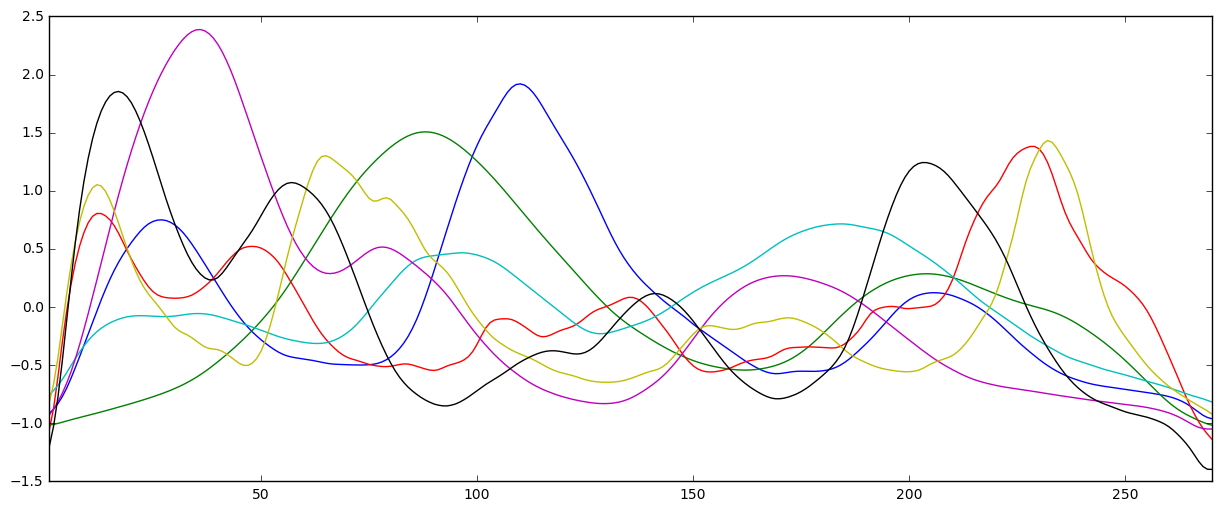

In [22]:
for i in range(7):
    row = words.groupby(words.index).mean().iloc[i]
    row.plot()

### We can also check to see whether the 'average' matches the individual plot for a given type

First, the 'average'

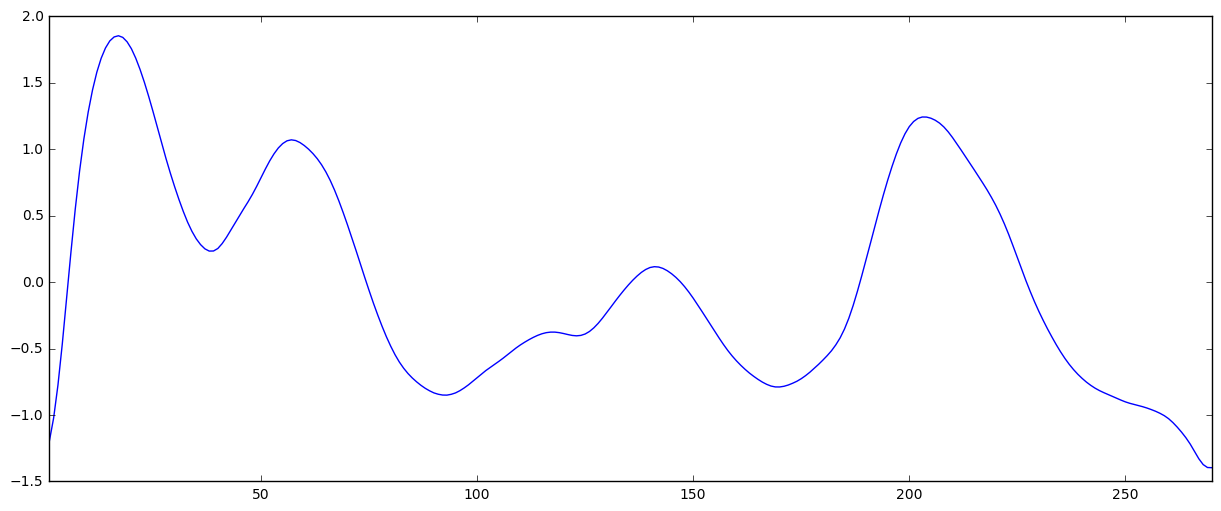

In [23]:
word_type = 7
row = words.groupby(words.index).mean().iloc[word_type-1]
row.plot()

Next the full sample of all those words

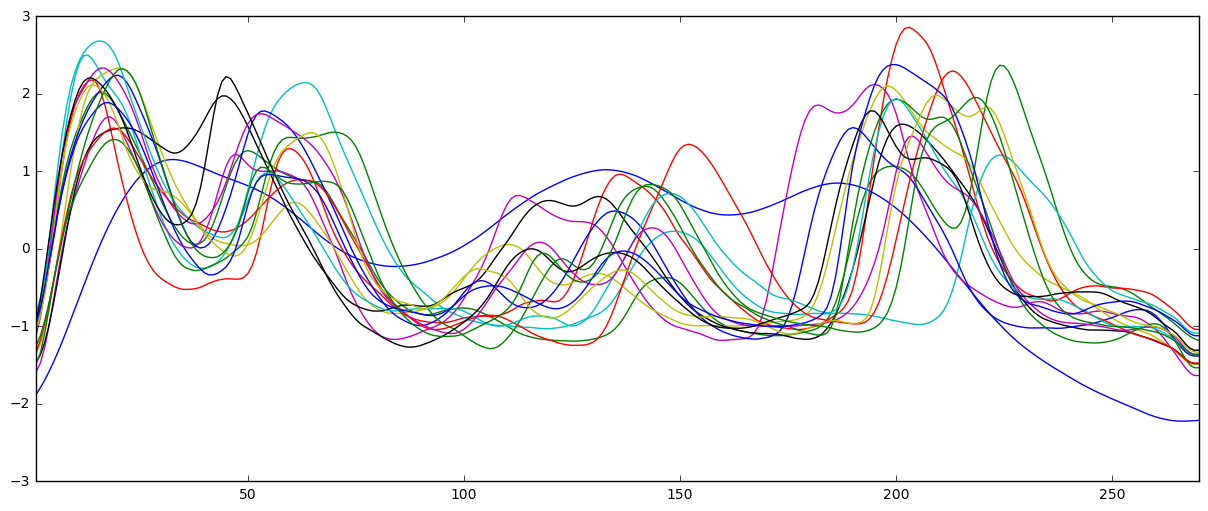

In [24]:
for i in range(words[words.index == word_type].shape[0]):
    row = words[words.index == word_type].iloc[i]
    row.plot()

### Let's try to code up the sensible distance function to describe the distance between two times series

In [25]:
# %load snippets/dtwdistance.py
#courtesy https://en.wikipedia.org/wiki/Dynamic_time_warping

def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [26]:
chosen_words = words[words.index == word_type]
s1 = chosen_words.iloc[2]
s2 = chosen_words.iloc[3]
print(type(s1))
DTWDistance(s1.values, s2.values)

<class 'pandas.core.series.Series'>


6.58261365073929

In [27]:
s3 = words.iloc[0]
DTWDistance(s1.values, s3.values)

11.099002878491204

In [28]:
s3 = words.iloc[0]
DTWDistance(s2.values, s3.values)

10.501580760094857

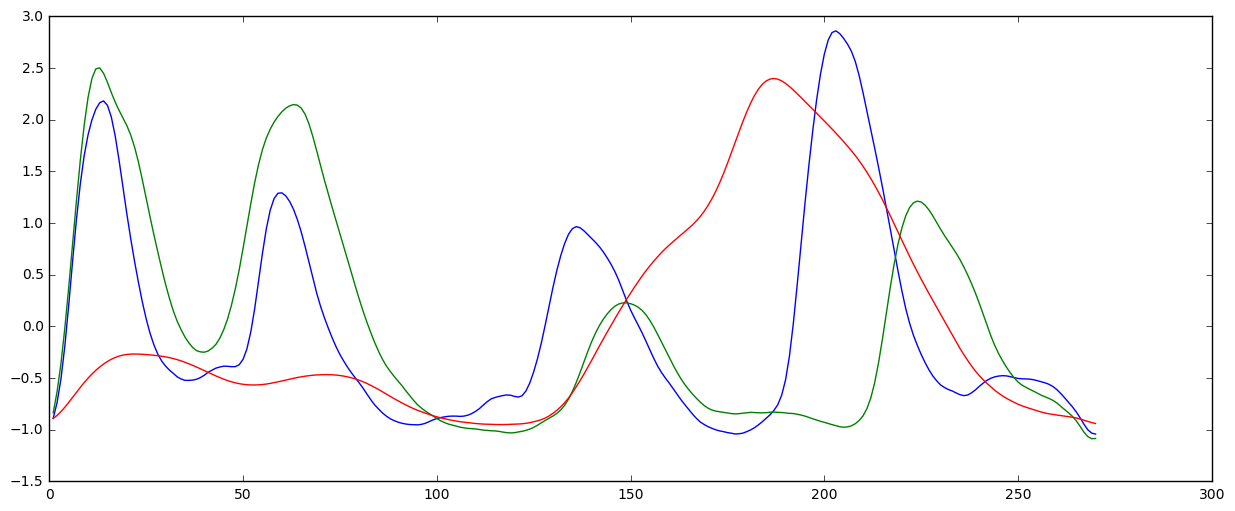

In [29]:
plt.plot(s1)
plt.plot(s2)
plt.plot(s3)

### Compare the performance of Euclidean distance with that of DTDW for s1, s2, s3 as specified above

In [30]:
# %load snippets/euclidedistance.py
def EuclidDistance(s1, s2):
    sum_squares = 0
    for i in range(len(s1)):
        sum_squares = sum_squares + (s1[i] - s2[i])**2
    return sqrt(sum_squares)

In [34]:
EuclidDistance(s1.values,s2.values)

18.48947144447024

In [35]:
EuclidDistance(s1.values,s3.values)

18.48947144447024

In [37]:
EuclidDistance(s2.values,s3.values)

25.452544931489548

In [38]:
# The Euclidean distance is much bigger than the DTW distance.

### Can you classify a random row by determining which 'mean' curve it is closest to? How successful is this?

In [41]:
# %load snippets/nearestmean.py

from random import randint

def test_idea(words_df):
    distances = []
    mean_words = words_df.groupby(words_df.index).mean()
    i = randint(0, words_df.shape[0])
    random_word = words_df.iloc[i]
    for mean_idx in range(mean_words.shape[0]):
        current_mean_word = mean_words.iloc[mean_idx]
        distances.append(DTWDistance(current_mean_word.values, random_word.values))
    return (random_word.name, distances)

word_type, distances = test_idea(words)
indexed_distances = enumerate(distances)
print(word_type)
list(indexed_distances)

7


[(0, 7.8718750112282585),
 (1, 7.826805976282427),
 (2, 6.195442117181426),
 (3, 8.231383340938319),
 (4, 9.401864191171233),
 (5, 8.217120064750418),
 (6, 6.179966192442029),
 (7, 6.073796575895137),
 (8, 9.385725869864592),
 (9, 7.822630068145775),
 (10, 8.04064486905293),
 (11, 9.128311710914872),
 (12, 8.12589940195799),
 (13, 9.054802080314664),
 (14, 7.221817195428625),
 (15, 7.907259340007126),
 (16, 8.898302139802448),
 (17, 7.760993994311558),
 (18, 7.663531738259985),
 (19, 4.986706187237167),
 (20, 7.674660483815955),
 (21, 6.128431268279339),
 (22, 8.731300373536255),
 (23, 9.124002953343329),
 (24, 8.158581506910993),
 (25, 8.798217541340493),
 (26, 8.627257069791382),
 (27, 10.209835853273589),
 (28, 5.7522168847842075),
 (29, 7.261797231992439),
 (30, 9.036983522702835),
 (31, 12.221284995256896),
 (32, 9.508936029532801),
 (33, 7.9110818815421755),
 (34, 6.863702491918118),
 (35, 9.0709266487472),
 (36, 8.719120316761458),
 (37, 8.832001001753177),
 (38, 11.799266088156